In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
df = pd.read_csv('robi.train.csv')

In [3]:
def get_no_of_unique_values(df, col):
    return df[col].nunique()

def unique_value_per_columns(df, n = 10):
    for i in df.columns:
        unique_val = get_no_of_unique_values(df, i)
        
        if unique_val<10:print(i,unique_val, df[i].unique())
        else:continue

def print_columns_data_type(df):
    for x in df.columns:
        types = set([type(y) for y in df[x]])
        print(x, types)

def create_dummy(df,dumb):
    for x in dumb:
        dummies = pd.get_dummies(df[x],prefix = x,dummy_na = False)
        df = df.drop([x],axis = 1)
        df = pd.concat([df,dummies],axis=1)
    return df


In [4]:
#columns that has less than 10 unique values
unique_value_per_columns(df, 10)

gender 2 ['M' 'F']
s11 2 ['Y' 'N']
s12 2 ['N' 'Y']
s13 2 [1 0]
s16 4 ['D' 'B' 'C' 'A']
s17 4 ['D' 'C' 'B' 'A']
s18 4 ['B' 'D' 'C' 'A']
s48 2 [0 1]
s52 4 ['1' 'l' '0' 'o']
s53 2 ['  ' ' ']
s54 9 [nan 'b2' 'aa' '22' '2a' '2b' 'a2' 'bb' 'ab' 'ba']
s55 9 ['kK' nan 'kk' '2K' 'k2' 'KK' '22' 'K2' '2k' 'Kk']
s56 0 [nan]
s57 0 [nan]
s58 2 ['B' 'A']
s59 0 [nan]
s69 4 ['x' '~1' 'C`' '0']
s70 4 ['op: D' 'op: C' 'op: B' 'op: A']
s71 4 ['b' 'd' 'c' 'a']
n12 2 [0 1]
n13 2 [0 1]
n15 7 [5 3 2 4 1 6 0]
label 2 [0 1]


In [5]:
#dropping unecessary columns
df = df.drop(['s59', 's57', 's53' ,'s56'], axis = 1)

unique_value_per_columns(df, 10)

In [6]:
gender_mapper =  dict(zip(['M','F'],[0,1]))
s11_mapper =  dict(zip(['Y','N'],[0,1]))
s12_mapper =  dict(zip(['N','Y'],[0,1]))
s58_mapper =  dict(zip(['B','A'],[0,1]))
s52_mapper =  dict(zip(['1','l','0','o'],[1,1,0,0]))

df['gender'] = df['gender'].replace(gender_mapper)
df['s11'] = df['s11'].replace(s11_mapper)
df['s12'] = df['s12'].replace(s12_mapper)
df['s58'] = df['s58'].replace(s58_mapper)
df['s52'] = df['s52'].replace(s52_mapper)

In [7]:
unique_value_per_columns(df, 10)

gender 2 [0 1]
s11 2 [0 1]
s12 2 [0 1]
s13 2 [1 0]
s16 4 ['D' 'B' 'C' 'A']
s17 4 ['D' 'C' 'B' 'A']
s18 4 ['B' 'D' 'C' 'A']
s48 2 [0 1]
s52 2 [1 0]
s54 9 [nan 'b2' 'aa' '22' '2a' '2b' 'a2' 'bb' 'ab' 'ba']
s55 9 ['kK' nan 'kk' '2K' 'k2' 'KK' '22' 'K2' '2k' 'Kk']
s58 2 [0 1]
s69 4 ['x' '~1' 'C`' '0']
s70 4 ['op: D' 'op: C' 'op: B' 'op: A']
s71 4 ['b' 'd' 'c' 'a']
n12 2 [0 1]
n13 2 [0 1]
n15 7 [5 3 2 4 1 6 0]
label 2 [0 1]


In [8]:
#dropping couuple of more attributes that seem unnecessary
df.drop(['s54', 's55'], axis = 1, inplace = True)

In [9]:
print_columns_data_type(df)

id {<class 'str'>}
gender {<class 'int'>}
s11 {<class 'int'>}
s12 {<class 'int'>}
s13 {<class 'int'>}
s16 {<class 'str'>}
s17 {<class 'str'>}
s18 {<class 'str'>}
s48 {<class 'int'>}
s52 {<class 'int'>}
s58 {<class 'int'>}
s69 {<class 'str'>}
s70 {<class 'str'>}
s71 {<class 'str'>}
n1 {<class 'float'>}
n2 {<class 'float'>}
n3 {<class 'int'>}
n4 {<class 'float'>}
n5 {<class 'float'>}
n6 {<class 'float'>}
n7 {<class 'float'>}
n8 {<class 'float'>}
n9 {<class 'float'>}
n10 {<class 'float'>}
n11 {<class 'float'>}
n12 {<class 'int'>}
n13 {<class 'int'>}
n14 {<class 'float'>}
n15 {<class 'int'>}
label {<class 'int'>}


In [10]:
#print coulumns wise null value
list(zip(df.columns, df.isnull().sum(axis=0).tolist()))

[('id', 0),
 ('gender', 0),
 ('s11', 0),
 ('s12', 0),
 ('s13', 0),
 ('s16', 0),
 ('s17', 0),
 ('s18', 0),
 ('s48', 0),
 ('s52', 0),
 ('s58', 0),
 ('s69', 0),
 ('s70', 0),
 ('s71', 0),
 ('n1', 0),
 ('n2', 0),
 ('n3', 0),
 ('n4', 0),
 ('n5', 0),
 ('n6', 0),
 ('n7', 0),
 ('n8', 0),
 ('n9', 0),
 ('n10', 0),
 ('n11', 0),
 ('n12', 0),
 ('n13', 0),
 ('n14', 0),
 ('n15', 0),
 ('label', 0)]

In [11]:
#backup copy
df_backup = df.copy(deep=True)

In [12]:
#dropping of id
df.drop(['id'], axis = 1, inplace = True)

In [13]:
#one hot encoding for non binary class

for i in df.columns:
    unique_val = get_no_of_unique_values(df, i)
    if unique_val<6 and unique_val>2:
        df = create_dummy(df, [i])

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline 
from  sklearn.ensemble import GradientBoostingClassifier as gbc

In [15]:
min_ = df.min()
max_ = df.max()
normalized_df=(df-min_)/(max_-min_)

In [16]:
label = normalized_df['label']
normalized_df = normalized_df.drop(['label'], axis = 1)

In [17]:
X,XTEST,Y, YTEST = train_test_split(normalized_df,label,test_size = .3,random_state = 42)

In [18]:
#model = LogisticRegression()
model = gbc()
scaler = StandardScaler()  #not necessay, data is already standadized
training_pipeline = make_pipeline(scaler, model)

In [19]:
training_pipeline.fit(X,Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [20]:
prediction = training_pipeline.predict(XTEST)

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))  

In [23]:
print_score(training_pipeline,X,Y,XTEST,YTEST,train=False)

Test Result:

accuracy score: 0.8850

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      7099
         1.0       0.72      0.49      0.58      1398

    accuracy                           0.89      8497
   macro avg       0.81      0.73      0.76      8497
weighted avg       0.88      0.89      0.88      8497


Confusion Matrix: 
 [[6834  265]
 [ 712  686]]



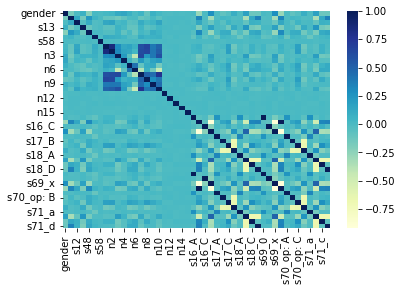

In [24]:
import seaborn as sns
corr = normalized_df.corr()

#corr = df_cached.corr()
#corr[corr<.5] = 0
dataplot = sns.heatmap(corr, cmap="YlGnBu", annot=False)
  
# displaying heatmap
plt.figsize=(120,120)
plt.savefig('heatmap.png', dpi=1200, )

In [25]:
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import callbacks 
import os


class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, df,label, batch_size=128):

       
        self.main_dataset = df.to_numpy()
        self.main_label = label.reshape(-1)
        self.no_of_fetures = len(df.columns)

        self.batch_size = batch_size
        self.training_dataset = None 
        self.training_label = None
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.training_dataset) / self.batch_size))

    def __getitem__(self, index):

        X = self.training_dataset[index*self.batch_size:(index+1)*self.batch_size]
        y = self.training_label[index*self.batch_size:(index+1)*self.batch_size]
        
        return X, y

    def on_epoch_end(self):
        positive_index = self.main_label == 1
        negative_index = self.main_label == 0
        
        positive_data = self.main_dataset[positive_index]
        negative_data = self.main_dataset[negative_index]
        
        #print('Negative: ' ,len(negative_index),negative_index.shape ,'Positive: ',len(positive_index))
        
        index = np.random.choice(negative_data.shape[0], size=positive_data.shape[0], replace=False)
        
        negative_data = negative_data[index]

        self.training_dataset =  np.concatenate((positive_data, negative_data), axis=0)
        self.training_label = np.array([1]*len(positive_data) + [0]*len(negative_data))
        
        self.training_dataset , self.training_label = shuffle(self.training_dataset, self.training_label)
        
        print('Training dataset shape: ', self.training_dataset.shape)
        print('Training label shape: ', self.training_label.shape)
    
 ##########################################################################################################################################   
class CFG:
    MODEL_SAVE_DIR = 'logs'
cfg = CFG()

early_stop = callbacks.EarlyStopping(monitor="val_accuracy", mode="max",
                                    restore_best_weights=True, patience=10
                                    )
checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join('logs\saved_model', "{epoch:04d}-{val_accuracy:.3f}.h5"),
                                        save_weights_only=False,
                                        monitor='val_accuracy',
                                        model='max',
                                        save_best_only=False,
                                    )

csv_logs = callbacks.CSVLogger(os.path.join(cfg.MODEL_SAVE_DIR, "logs.csv"))
reduce_lr = callbacks.ReduceLROnPlateau(factor=0.66, monitor="val_accuracy", mode="max", patience=10)

############################################################################################################################################


inp = tf.keras.layers.Input(shape=(len(normalized_df.columns)))
x = tf.keras.layers.Dense(64, activation='relu')(inp)
#x = tf.keras.layers.BatchNormalization() (x)
x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(256, activation='relu')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.33)(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.33)(x)

x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inp, outputs=x)
model.compile(loss = 'binary_crossentropy', optimizer= tf.optimizers.Adam(learning_rate=.007) , metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 64)                3008      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0     

2022-06-26 17:52:44.860734: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-26 17:52:44.860801: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: JahidsWorkstation
2022-06-26 17:52:44.860810: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: JahidsWorkstation
2022-06-26 17:52:44.861005: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.129.6
2022-06-26 17:52:44.861036: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.129.6
2022-06-26 17:52:44.861043: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.129.6
2022-06-26 17:52:44.861438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following

In [26]:
X,XTEST,Y, YTEST = train_test_split(normalized_df,label,test_size = .2,random_state = 42)

In [27]:
normalized_df.shape

(28322, 46)

In [28]:
train_data_gen = DataGenerator(X,Y.to_numpy(), batch_size=128)
valid_data_gen = DataGenerator(XTEST,YTEST.to_numpy(), batch_size=128)

Training dataset shape:  (7610, 46)
Training label shape:  (7610,)
Training dataset shape:  (1910, 46)
Training label shape:  (1910,)


In [29]:

model.fit(train_data_gen,
          epochs=300,
          validation_data=valid_data_gen,
          callbacks=[ checkpoint, csv_logs, reduce_lr])

Epoch 1/300
50/59 [========================>.....] - ETA: 0s - loss: 0.5112 - accuracy: 0.7647Training dataset shape:  (1910, 46)
Training label shape:  (1910,)
59/59 [==============================] - 1s 7ms/step - loss: 0.5112 - accuracy: 0.7668 - val_loss: 0.4802 - val_accuracy: 0.7913 - lr: 0.0070
Training dataset shape:  (7610, 46)
Training label shape:  (7610,)
Epoch 2/300
56/59 [===========================>..] - ETA: 0s - loss: 0.4787 - accuracy: 0.7881Training dataset shape:  (1910, 46)
Training label shape:  (1910,)
59/59 [==============================] - 0s 4ms/step - loss: 0.4789 - accuracy: 0.7868 - val_loss: 0.4767 - val_accuracy: 0.7896 - lr: 0.0070
Training dataset shape:  (7610, 46)
Training label shape:  (7610,)
Epoch 3/300
43/59 [====================>.........] - ETA: 0s - loss: 0.4812 - accuracy: 0.7733Training dataset shape:  (1910, 46)
Training label shape:  (1910,)
59/59 [==============================] - 0s 4ms/step - loss: 0.4781 - accuracy: 0.7791 - val_loss: 

In [32]:
model = tf.keras.models.load_model(r'logs/0046-0.810.h5')


In [39]:
prediction =np.round(model.predict(XTEST)).reshape(-1)

178/178 [==============================] - 0s 1ms/step


In [40]:
print(confusion_matrix(YTEST, prediction))
print(classification_report(YTEST, prediction))

[[3789  921]
 [ 207  748]]
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87      4710
         1.0       0.45      0.78      0.57       955

    accuracy                           0.80      5665
   macro avg       0.70      0.79      0.72      5665
weighted avg       0.86      0.80      0.82      5665

